# Quick-and-dirty experimental image viewer

In [1]:
#%matplotlib inline
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import hh_utilities as hu

In [2]:
plt.rcParams["figure.figsize"] = (20,12)

In [8]:
data_dir = "/media/hh/hd_internal/_data_DS/DSR/satelliteImages/Borneo/3347/"

dataset = gdal.Open(data_dir + "20180618_020522_1033_3B_AnalyticMS_SR.tif", gdal.GA_ReadOnly)
nLayer = dataset.RasterCount
for k in range(1, dataset.RasterCount + 1):
    band = dataset.GetRasterBand(k)
    if k == 1:
        imgArr = band.ReadAsArray()
        sz = np.shape(imgArr)
        imgArr = imgArr.reshape((sz[0], sz[1], 1))
    else:
        imgArr = np.append(imgArr, band.ReadAsArray().reshape((sz[0], sz[1], 1)), axis = 2)


370.0
0.5
457.0
0.5
402.0
0.5
3702.0
0.5752913752913753


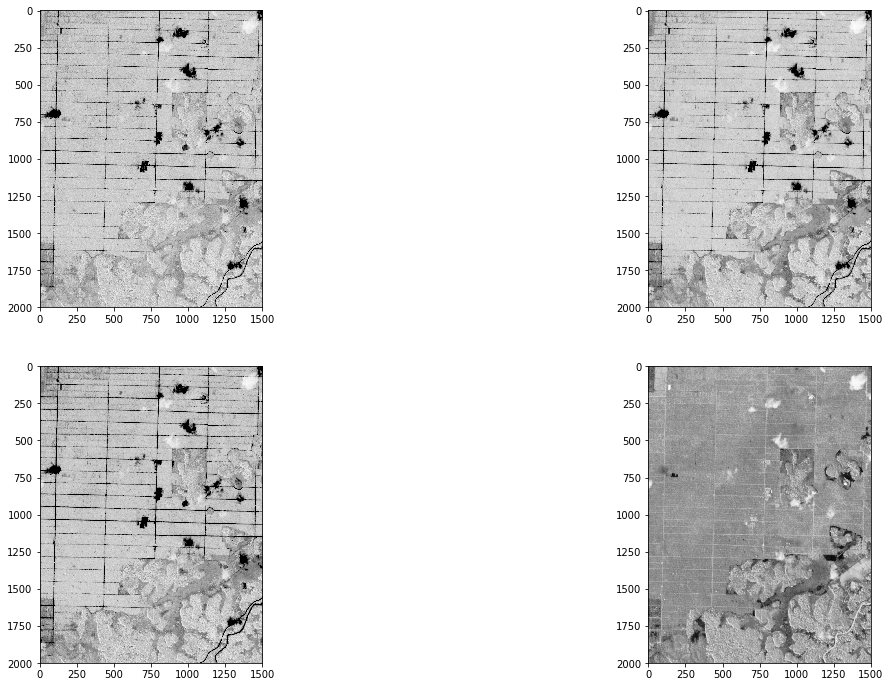

In [9]:
for k in range(nLayer):
    # scale and convert to float
    img = imgArr[500:2500,1000:2500,k]
    lim = 2 * np.median(img)
    img[img>lim] = lim
    # print(np.min(img), np.max(img))
    print(np.median(img))
    img = (img / (np.max(img))).astype(np.float)
    print(np.median(img))
    plt.subplot(2, 2, k+1)
    ax = plt.imshow(img, cmap=plt.cm.Greys)
    


In [5]:
# from PIL import Image
# im = Image.open(data_dir + "20170509_032544_1_0c19_3B_AnalyticMS.tif")